In [1]:
# Importing necessary packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import itertools

In [2]:
# Uploading Dataset and inspecting its contents
df = pd.DataFrame()
df = pd.read_csv('/Users/dwreiter/Desktop/Work/Springboard/Video Game Capstone Project/Data Wrangling/vg_nlp_df.csv', delimiter='\t', index_col=0)
df.head()

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,PlayStation,PlayStation 2,PlayStation 3,PlayStation 4,PlayStation Vita,PSP,Sega Dreamcast,Xbox,Xbox 360,Xbox One
0,2010 FIFA World Cup South Africa,PS3,0.077199,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,1,0,0,0,0,0,0,0
1,2010 FIFA World Cup South Africa,X360,0.036675,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,ATV Offroad Fury,PS2,0.034426,0.000000,0.0,0.0,0.0,0.0,0.0,0.039822,...,0,1,0,0,0,0,0,0,0,0
3,ATV Offroad Fury 2,PS2,0.035777,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,1,0,0,0,0,0,0,0,0
4,Ace Combat 04: Shattered Skies,PS2,0.053300,0.001371,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,1,0,0,0,0,0,0,0,0


In [3]:
# Converting Categorical variables into Dummy Variables
df = pd.get_dummies(df, columns = ['Publisher', 'Developer', 'Rating'])

# Setting X and y for Global Sales
GS_X = df.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
GS_y = df['Global_Sales']

# Splitting the data into Train and Test
GS_X_train, GS_X_test, GS_y_train, GS_y_test = train_test_split(GS_X, GS_y, test_size=0.2, random_state=42)

In [13]:
# Using a Random Forest Regressor
GS_PG = {'n_estimators': [10, 100]}

GS_RF = RandomForestRegressor(min_samples_leaf=3, max_leaf_nodes=1000, random_state=42)

# Using GridSearchCV to help avoid overfitting
GS_CV = GridSearchCV(GS_RF, GS_PG, cv=5)

GS_CV.fit(GS_X_train, GS_y_train)

GS_y_pred = GS_CV.predict(GS_X_test)

GS_R2 = GS_CV.score(GS_X_test, GS_y_test)
GS_RMSE = np.sqrt(mean_squared_error(GS_y_test, GS_y_pred))

print('R^2: ' + str(GS_R2))
print('Root Mean Squared Error: ' + str(GS_RMSE))

R^2: 0.427177708777
Root Mean Squared Error: 2.71872194631


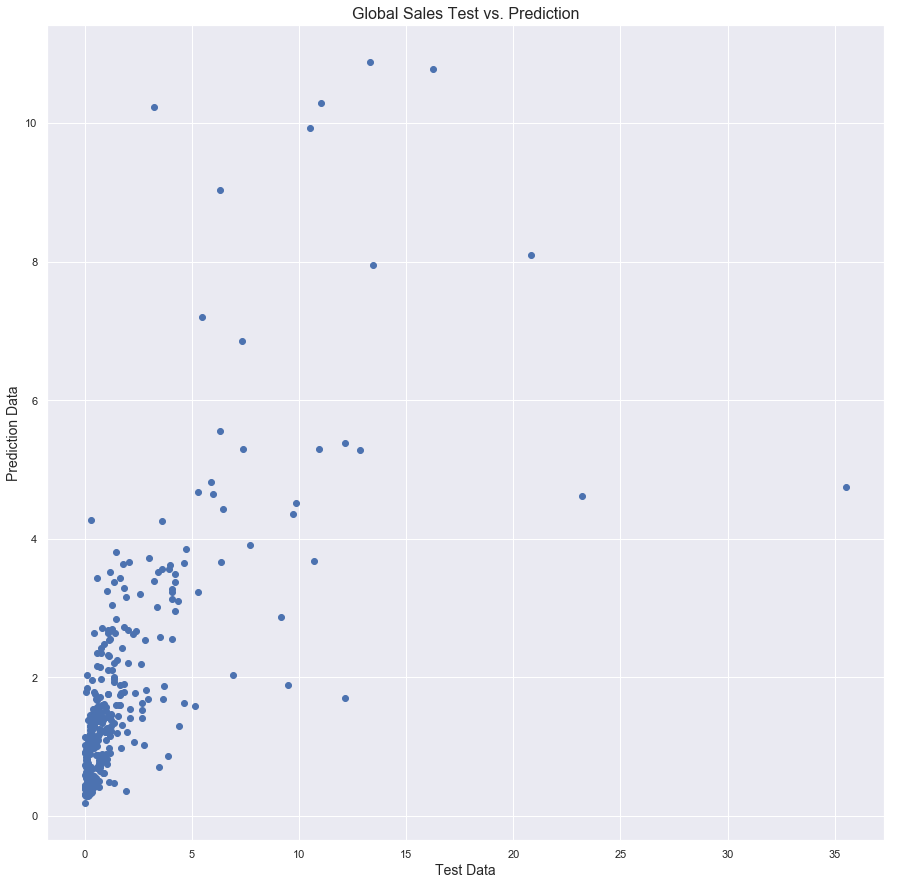

In [14]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(GS_y_test, GS_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('Global Sales Test vs. Prediction', fontsize=16)

In [15]:
# Looking at most important features
GS_Features = pd.Series(GS_CV.best_estimator_.feature_importances_, index=GS_X.columns).sort_values(ascending=False)
GS_Features

Critic_Score                                                0.083531
mw                                                          0.074927
super                                                       0.072384
User_Count                                                  0.067672
PC                                                          0.055662
mario                                                       0.051665
Critic_Count                                                0.027872
hasnt                                                       0.022519
a                                                           0.017193
perk                                                        0.015752
car                                                         0.012758
drive                                                       0.012724
cod                                                         0.012298
grand                                                       0.011764
fanboy                            

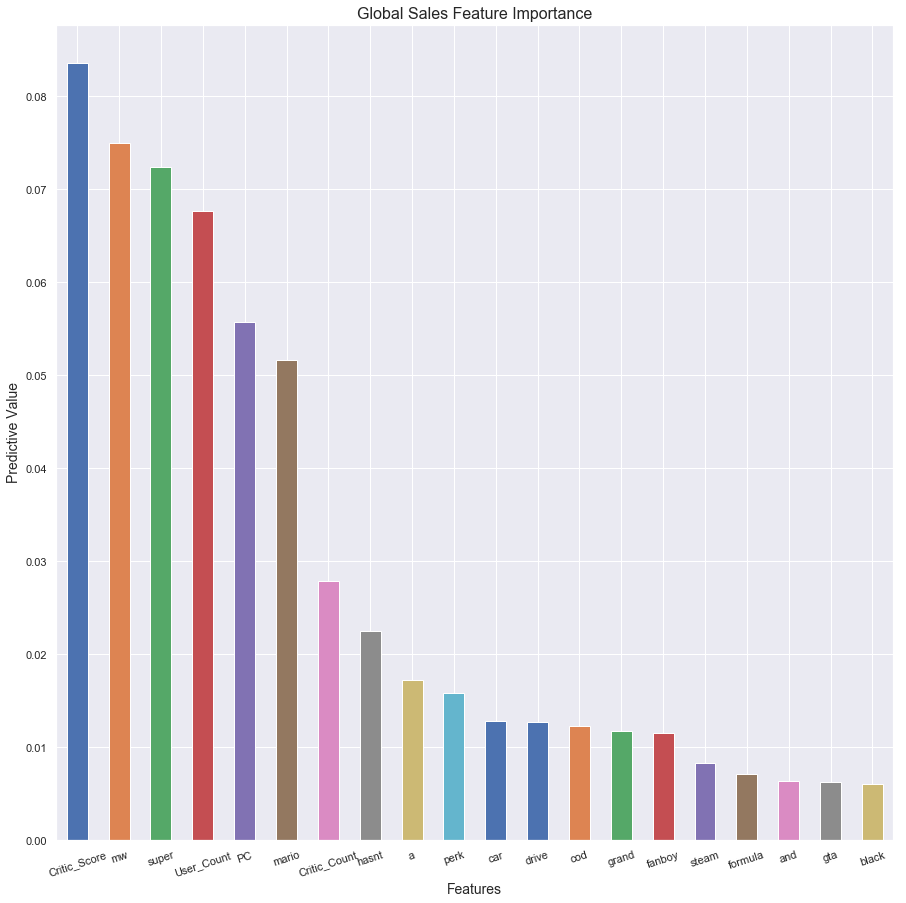

In [16]:
# Plotting Feature Importance
_ = GS_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=18)
_ = plt.xlabel('Features', fontsize=14)
_ = plt.ylabel('Predictive Value', fontsize=14)
_ = plt.title('Global Sales Feature Importance', fontsize=16)

In [17]:
# Finding out mislabeled data
GS_dif = GS_y_test[GS_y_test != GS_y_pred]
GS_dif = df.loc[list(GS_dif.index.values), :]
GS_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
530,God of War: Origins Collection,PS3,0.040925,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004393,...,0,0,0,0,0,0,0,0,1,0
1140,Rise of the Tomb Raider,PC,0.071693,0.004004,0.0,0.000000,0.000000,0.000965,0.000717,0.024437,...,0,0,0,0,0,0,0,0,1,0
168,Call of Duty: World at War,X360,0.072884,0.000417,0.0,0.000000,0.001384,0.000000,0.002036,0.009523,...,0,0,0,0,0,0,0,0,1,0
135,Burnout 2: Point of Impact,XB,0.030425,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
438,Far Cry 3,PS3,0.086870,0.003050,0.0,0.003266,0.000516,0.003542,0.000000,0.008077,...,0,0,0,0,0,0,0,0,1,0
1492,Top Spin 4,X360,0.078697,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004659,...,0,0,0,0,0,0,1,0,0,0
1304,Super Smash Bros. Brawl,Wii,0.065248,0.005026,0.0,0.000000,0.000000,0.000923,0.000000,0.008787,...,0,0,0,0,0,0,0,0,0,1
239,Dark Souls III,PC,0.068478,0.005560,0.0,0.000000,0.000802,0.000569,0.001401,0.003220,...,0,0,0,0,0,0,0,0,1,0
483,Fire Emblem: Awakening,3DS,0.084028,0.006495,0.0,0.000000,0.003198,0.003918,0.000000,0.002713,...,0,0,0,0,0,0,0,0,0,1
300,Diablo III,PC,0.070642,0.008427,0.0,0.000016,0.005490,0.001018,0.014894,0.005756,...,0,0,0,0,0,0,0,0,1,0


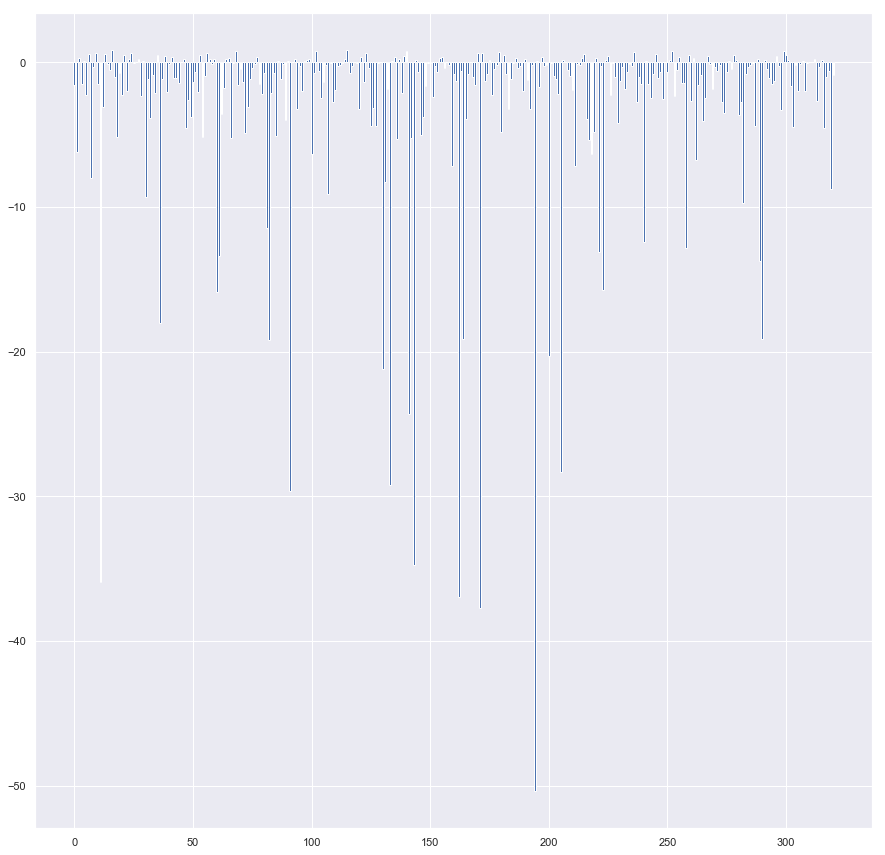

In [18]:
# Shows difference, zero in on bigger ones from there
_ = plt.bar(np.arange(len(GS_y_test)), (GS_y_test - GS_y_pred)/GS_y_test)

In [26]:
GS_dif_2 = GS_y_test[(GS_y_test - GS_y_pred)/GS_y_test < -20]
GS_dif_2 = df.loc[list(GS_dif_2.index.values), :]
GS_dif_2

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
361,Enemy Territory: Quake Wars,PC,0.068780,0.000000,0.0,0.0,0.000000,0.009416,0.000000,0.024777,...,0,0,0,0,0,0,0,0,0,1
1394,The Talos Principle,PS4,0.060802,0.003021,0.0,0.0,0.030542,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
1018,Painkiller,PC,0.038861,0.003083,0.0,0.0,0.000000,0.004333,0.000000,0.021394,...,0,0,0,0,0,0,0,0,1,0
988,Neverwinter Nights,PC,0.072741,0.005766,0.0,0.0,0.000000,0.001137,0.000000,0.009531,...,0,0,0,0,0,0,0,0,0,1
757,Mafia,PC,0.054500,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.004386,...,0,0,0,0,0,0,0,0,1,0
185,Child of Light,PS4,0.110520,0.016427,0.0,0.0,0.001307,0.000000,0.000000,0.000696,...,0,0,0,0,0,0,0,1,0,0
1599,Zero Escape: Virtue's Last Reward,3DS,0.064891,0.004045,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
1429,Tiger Woods PGA Tour 2005,PC,0.150584,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
1543,Warhammer Online: Age of Reckoning,PC,0.067238,0.004384,0.0,0.0,0.000890,0.003050,0.000494,0.003364,...,0,0,0,0,0,0,0,0,0,1
1564,World in Conflict,PC,0.077053,0.012004,0.0,0.0,0.001957,0.003662,0.000847,0.032085,...,0,0,0,0,0,0,0,0,0,1


In [36]:
GS_dif_2['Critic_Score']

361     84.0
1394    88.0
1018    81.0
988     91.0
757     88.0
185     82.0
1599    88.0
1429    91.0
1543    86.0
1564    89.0
514     87.0
Name: Critic_Score, dtype: float64

In [53]:
GS_dif_2.loc[757, 'User_Count']

863.0

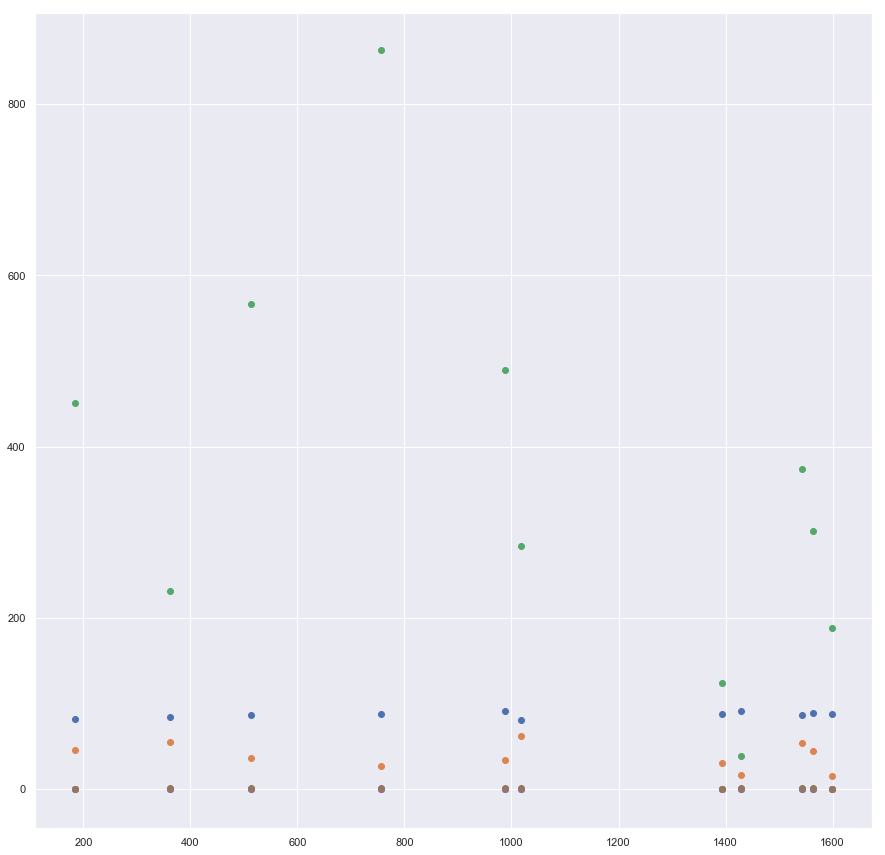

In [48]:
_ = plt.scatter(x=GS_dif_2.index, y=GS_dif_2['Critic_Score'])
_ = plt.scatter(x=GS_dif_2.index, y=GS_dif_2['Critic_Count'])
_ = plt.scatter(x=GS_dif_2.index, y=GS_dif_2['User_Count'])
_ = plt.scatter(x=GS_dif_2.index, y=GS_dif_2['mw'])
_ = plt.scatter(x=GS_dif_2.index, y=GS_dif_2['super'])
_ = plt.scatter(x=GS_dif_2.index, y=GS_dif_2['PC'])

** Trying same model when Global Sales is higher than the median.**

In [40]:
# Setting up Global Sales higher than the Median
GS_median = df['Global_Sales'].median()
GS_median = df[df['Global_Sales'] >= GS_median]

# Setting X and y for Global Sales
GS_MED_X = GS_median.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
GS_MED_y = GS_median['Global_Sales']

# Splitting the data into Train and Test
GS_MED_X_train, GS_MED_X_test, GS_MED_y_train, GS_MED_y_test = train_test_split(GS_MED_X, GS_MED_y, test_size=0.2, random_state=42)

In [41]:
# Using a Random Forest Regressor
GS_MED_PG = {'n_estimators': [10, 100]}

GS_MED_RF = RandomForestRegressor(random_state=42)

# Using GridSearchCV to help avoid overfitting
GS_MED_CV = GridSearchCV(GS_MED_RF, GS_MED_PG, cv=5)

GS_MED_CV.fit(GS_MED_X_train, GS_MED_y_train)

GS_MED_y_pred = GS_MED_CV.predict(GS_MED_X_test)

GS_MED_R2 = GS_MED_CV.score(GS_MED_X_test, GS_MED_y_test)
GS_MED_RMSE = np.sqrt(mean_squared_error(GS_MED_y_test, GS_MED_y_pred))

print('R^2: ' + str(GS_MED_R2))
print('Root Mean Squared Error: ' + str(GS_MED_RMSE))

R^2: 0.450507280728
Root Mean Squared Error: 2.85000486672


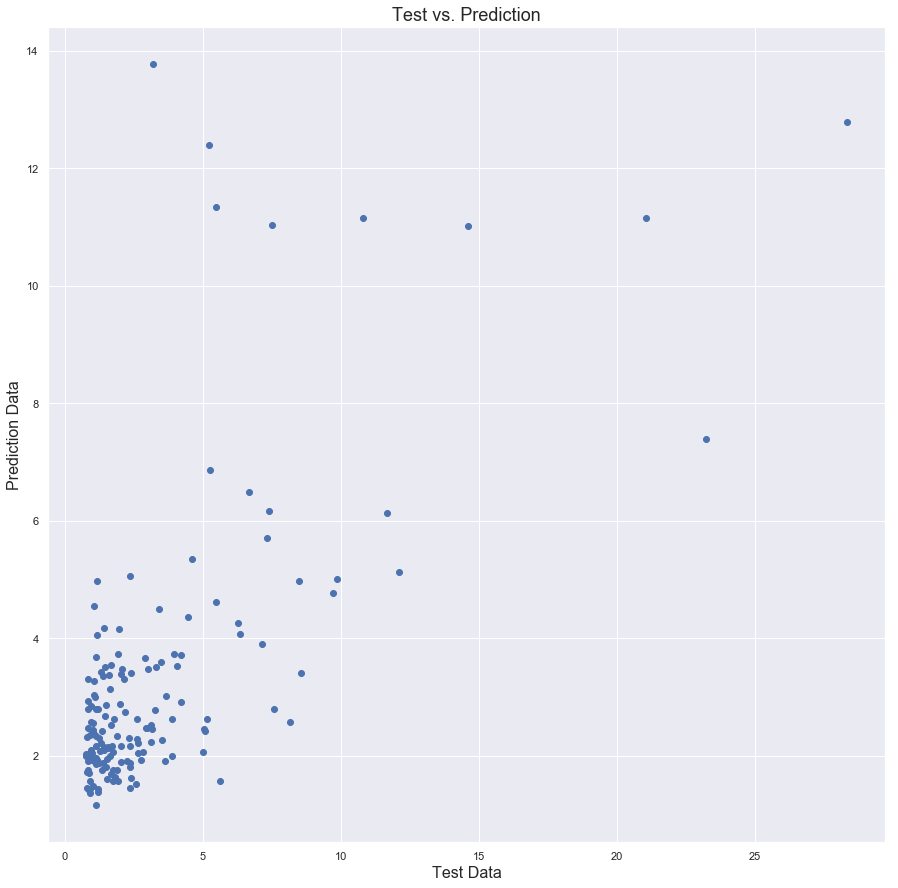

In [42]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(GS_MED_y_test, GS_MED_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('Global Sales (Above Median) Test vs. Prediction', fontsize=16)

In [43]:
# Looking at most important features
GS_MED_Features = pd.Series(GS_MED_CV.best_estimator_.feature_importances_, index=GS_MED_X.columns).sort_values(ascending=False)
GS_MED_Features

User_Count                                        0.083473
Critic_Score                                      0.057110
super                                             0.054694
mario                                             0.049911
kart                                              0.043626
mw                                                0.038981
call                                              0.027484
car                                               0.022867
Developer_Rockstar North                          0.020686
Developer_Polyphony Digital                       0.019468
cod                                               0.017205
place                                             0.011953
grand                                             0.010617
gta                                               0.009613
modern                                            0.008789
realism                                           0.007690
feel                                              0.0076

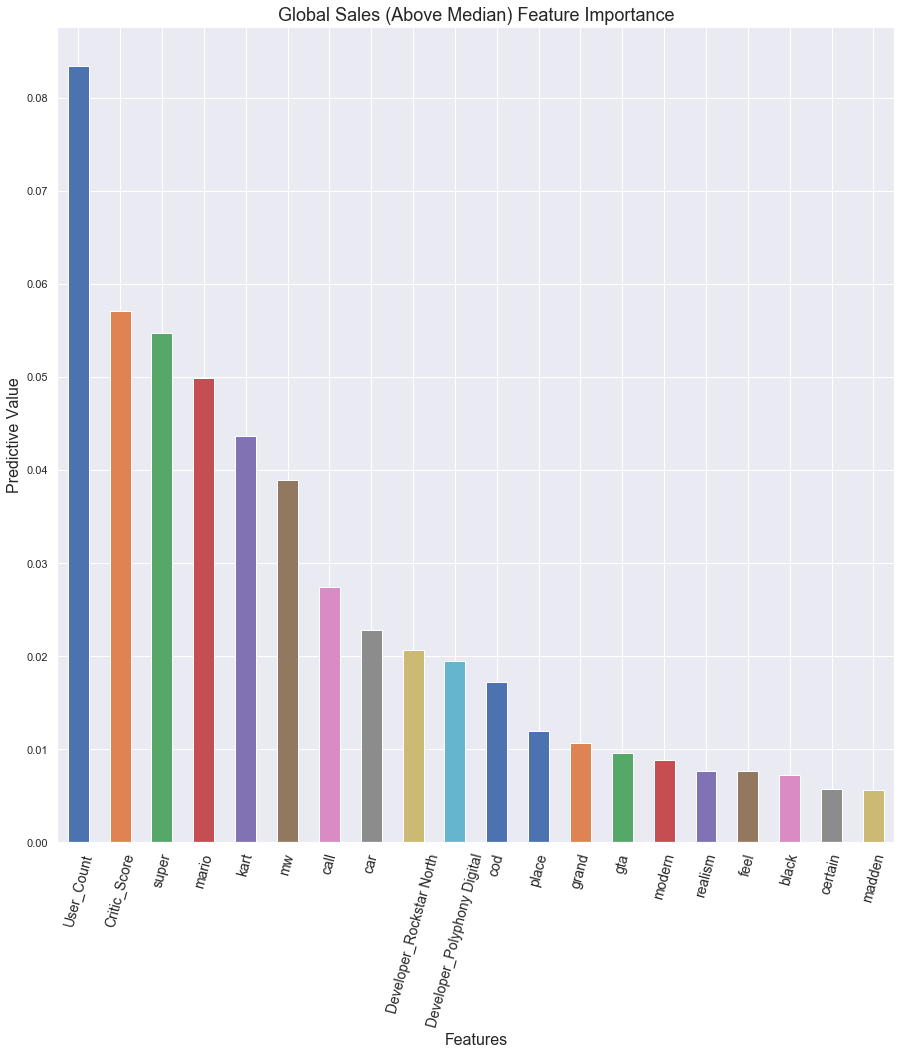

In [50]:
# Plotting Feature Importance
_ = GS_MED_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=75, fontsize=14)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel('Predictive Value', fontsize=16)
_ = plt.title('Global Sales (Above Median) Feature Importance', fontsize=18)

In [51]:
# Finding out mislabeled data
GS_MED_dif = GS_MED_y_test[GS_MED_y_test != GS_MED_y_pred]
GS_MED_dif = df.loc[list(GS_MED_dif.index.values), :]
GS_MED_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
383,FIFA 14,X360,0.069881,0.006116,0.0,0.000000,0.003892,0.002464,0.001155,0.000618,...,0,0,0,0,0,0,1,0,0,0
1391,The Sims: Hot Date,PC,0.069094,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
327,Dragon Age: Inquisition,PS4,0.085164,0.009128,0.0,0.000606,0.001332,0.004052,0.000860,0.011802,...,0,0,0,0,0,0,0,0,1,0
981,Need for Speed: Hot Pursuit,PS3,0.086360,0.006818,0.0,0.000000,0.001672,0.001488,0.000000,0.004135,...,0,0,0,0,0,0,0,1,0,0
1003,Oddworld: Abe's Oddysee,PS,0.091695,0.000000,0.0,0.000000,0.004071,0.010880,0.000000,0.018298,...,0,0,0,0,0,0,0,0,0,1
1566,World of Warcraft,PC,0.059948,0.010224,0.0,0.000000,0.006134,0.000463,0.000580,0.000877,...,0,0,0,0,0,0,0,0,0,1
1503,UFC Undisputed 3,X360,0.095018,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.007584,...,0,0,0,0,0,0,0,0,0,1
589,Halo 3,X360,0.066780,0.004895,0.0,0.000000,0.001607,0.000956,0.000509,0.007695,...,0,0,0,0,0,0,0,0,1,0
420,Fable,XB,0.061247,0.006830,0.0,0.000000,0.000000,0.001033,0.000000,0.006192,...,0,0,0,0,0,0,0,0,1,0
1559,World Soccer Winning Eleven 6 International,PS2,0.018159,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0


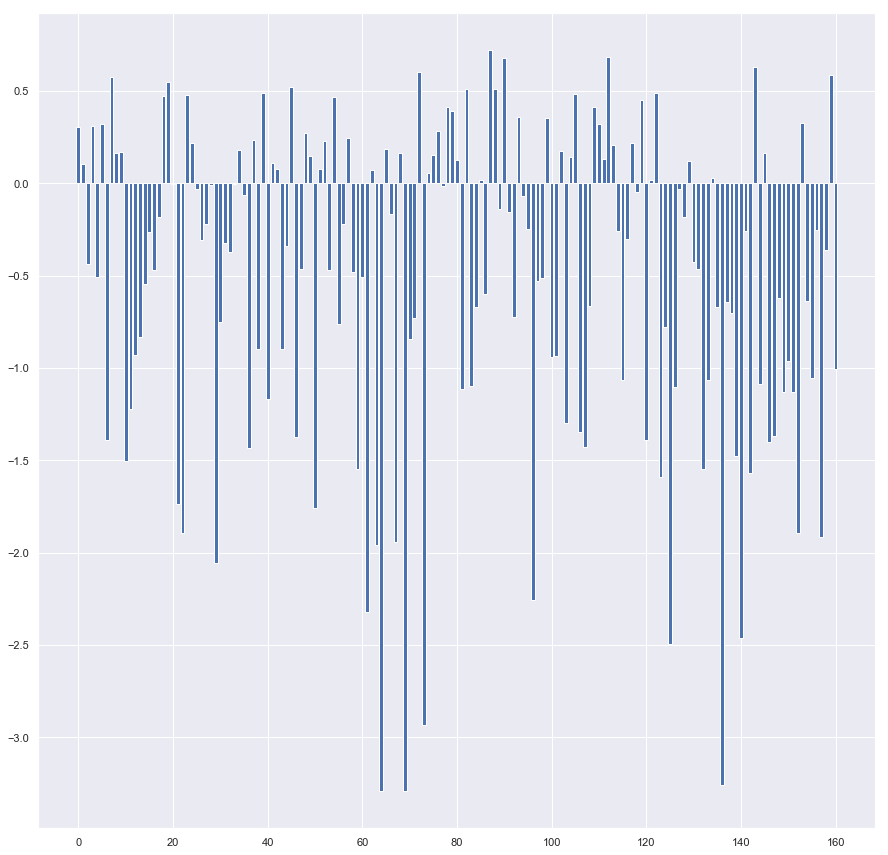

In [52]:
# Shows difference, zero in on bigger ones from there
_ = plt.bar(np.arange(len(GS_MED_y_test)), (GS_MED_y_test - GS_MED_y_pred)/GS_MED_y_test)

** Trying model for North American sales.**

In [53]:
# Setting X and y for North American Sales
NA_X = df.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
NA_y = df['NA_Sales']

# Splitting the data into Train and Test
NA_X_train, NA_X_test, NA_y_train, NA_y_test = train_test_split(NA_X, NA_y, test_size=0.2, random_state=42)

In [54]:
# Using a Random Forest Regressor
NA_PG = {'n_estimators': [10, 100]}

NA_RF = RandomForestRegressor(min_samples_leaf=3, max_leaf_nodes=1000, random_state=42)

# Using GridSearchCV to help avoid overfitting
NA_CV = GridSearchCV(NA_RF, NA_PG, cv=5)

NA_CV.fit(NA_X_train, NA_y_train)

NA_y_pred = NA_CV.predict(NA_X_test)

NA_R2 = NA_CV.score(NA_X_test, NA_y_test)
NA_RMSE = np.sqrt(mean_squared_error(NA_y_test, NA_y_pred))

print('R^2: ' + str(NA_R2))
print('Root Mean Squared Error: ' + str(NA_RMSE))

R^2: 0.427934081067
Root Mean Squared Error: 1.32674922366


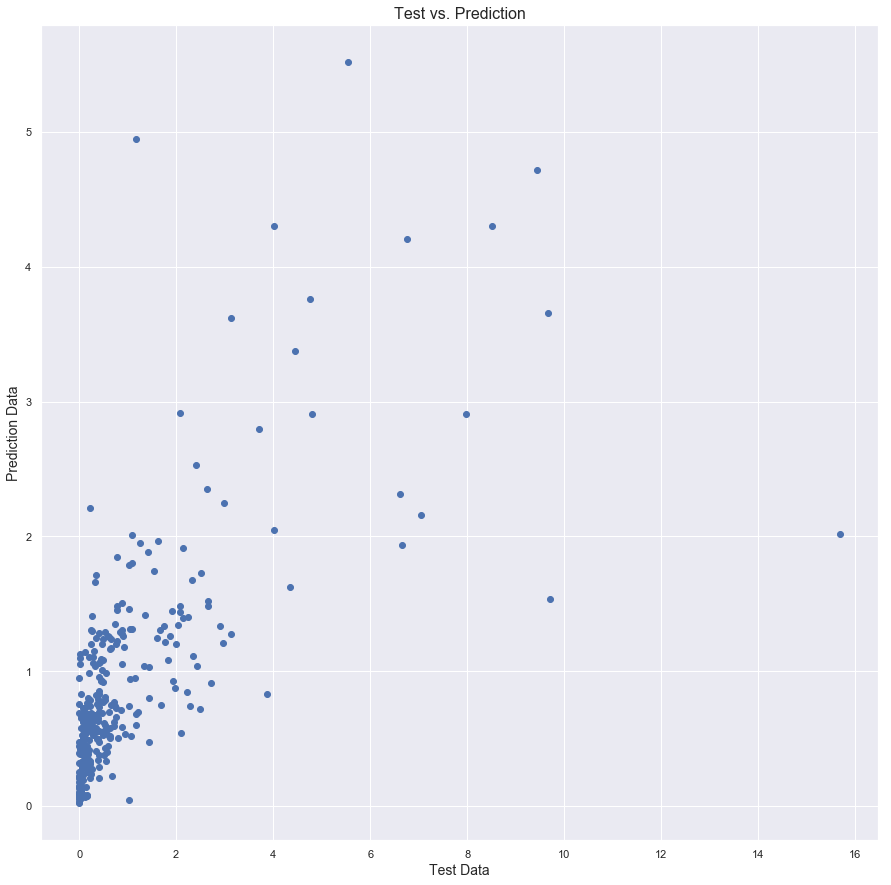

In [56]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(NA_y_test, NA_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('North American Sales Test vs. Prediction', fontsize=16)

In [57]:
# Looking at most important features
NA_Features = pd.Series(NA_CV.best_estimator_.feature_importances_, index=NA_X.columns).sort_values(ascending=False)
NA_Features

Critic_Score                                   0.135790
mw                                             0.088687
super                                          0.059043
mario                                          0.051129
Critic_Count                                   0.051008
User_Count                                     0.040096
modern                                         0.031450
PC                                             0.030632
madden                                         0.028776
black                                          0.019736
suck                                           0.019503
a                                              0.007115
star                                           0.006470
coop                                           0.006280
perk                                           0.005333
cod                                            0.005291
u                                              0.004869
realism                                        0

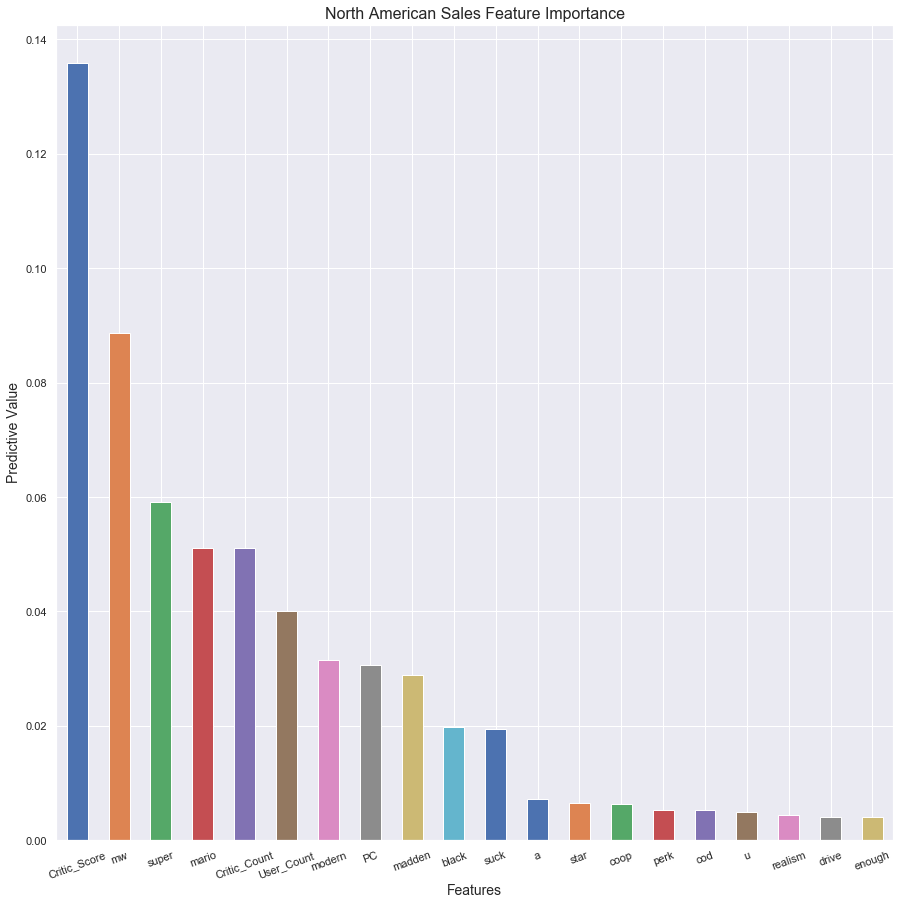

In [60]:
# Plotting Feature Importance
_ = NA_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=20)
_ = plt.xlabel('Features', fontsize=14)
_ = plt.ylabel('Predictive Value', fontsize=14)
_ = plt.title('North American Sales Feature Importance', fontsize=16)

In [61]:
# Finding out mislabeled data
NA_dif = NA_y_test[NA_y_test != NA_y_pred]
NA_dif = df.loc[list(NA_dif.index.values), :]
NA_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
530,God of War: Origins Collection,PS3,0.040925,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004393,...,0,0,0,0,0,0,0,0,1,0
1140,Rise of the Tomb Raider,PC,0.071693,0.004004,0.0,0.000000,0.000000,0.000965,0.000717,0.024437,...,0,0,0,0,0,0,0,0,1,0
168,Call of Duty: World at War,X360,0.072884,0.000417,0.0,0.000000,0.001384,0.000000,0.002036,0.009523,...,0,0,0,0,0,0,0,0,1,0
135,Burnout 2: Point of Impact,XB,0.030425,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
438,Far Cry 3,PS3,0.086870,0.003050,0.0,0.003266,0.000516,0.003542,0.000000,0.008077,...,0,0,0,0,0,0,0,0,1,0
1492,Top Spin 4,X360,0.078697,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004659,...,0,0,0,0,0,0,1,0,0,0
1304,Super Smash Bros. Brawl,Wii,0.065248,0.005026,0.0,0.000000,0.000000,0.000923,0.000000,0.008787,...,0,0,0,0,0,0,0,0,0,1
239,Dark Souls III,PC,0.068478,0.005560,0.0,0.000000,0.000802,0.000569,0.001401,0.003220,...,0,0,0,0,0,0,0,0,1,0
483,Fire Emblem: Awakening,3DS,0.084028,0.006495,0.0,0.000000,0.003198,0.003918,0.000000,0.002713,...,0,0,0,0,0,0,0,0,0,1
300,Diablo III,PC,0.070642,0.008427,0.0,0.000016,0.005490,0.001018,0.014894,0.005756,...,0,0,0,0,0,0,0,0,1,0


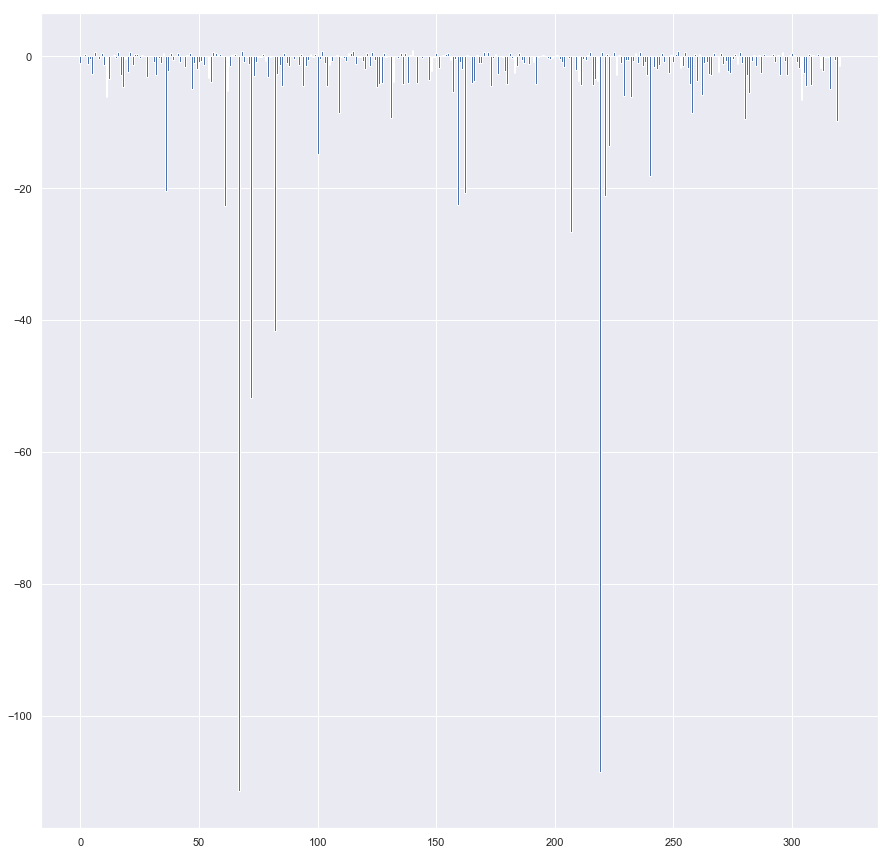

In [62]:
# Shows difference, zero in on bigger ones from there
_ = plt.bar(np.arange(len(NA_y_test)), (NA_y_test - NA_y_pred)/NA_y_test)

** Trying same model when North American Sales is higher than the median.**

In [63]:
# Setting up North American Sales higher than the Median
NA_median = df['NA_Sales'].median()
NA_median = df[df['NA_Sales'] >= NA_median]

# Setting X and y for North American Sales
NA_MED_X = NA_median.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
NA_MED_y = NA_median['NA_Sales']

# Splitting the data into Train and Test
NA_MED_X_train, NA_MED_X_test, NA_MED_y_train, NA_MED_y_test = train_test_split(NA_MED_X, NA_MED_y, test_size=0.2, random_state=42)

In [64]:
# Using a Random Forest Regressor
NA_MED_PG = {'n_estimators': [10, 100]}

NA_MED_RF = RandomForestRegressor(random_state=42)

# Using GridSearchCV to help avoid overfitting
NA_MED_CV = GridSearchCV(NA_MED_RF, NA_MED_PG, cv=5)

NA_MED_CV.fit(NA_MED_X_train, NA_MED_y_train)

NA_MED_y_pred = NA_MED_CV.predict(NA_MED_X_test)

NA_MED_R2 = NA_MED_CV.score(NA_MED_X_test, NA_MED_y_test)
NA_MED_RMSE = np.sqrt(mean_squared_error(NA_MED_y_test, NA_MED_y_pred))

print('R^2: ' + str(NA_MED_R2))
print('Root Mean Squared Error: ' + str(NA_MED_RMSE))

R^2: 0.157412703899
Root Mean Squared Error: 1.51211992304


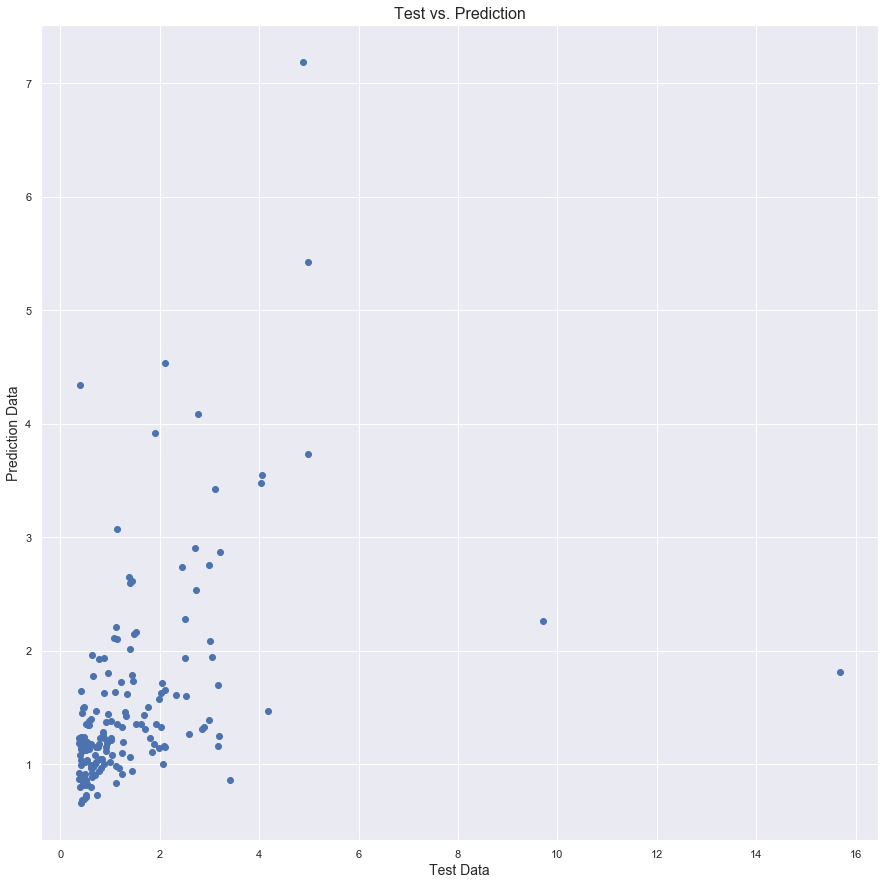

In [65]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(NA_MED_y_test, NA_MED_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('North American Sales (Above Median) Test vs. Prediction', fontsize=16)

In [66]:
# Looking at most important features
NA_MED_Features = pd.Series(NA_MED_CV.best_estimator_.feature_importances_, index=NA_MED_X.columns).sort_values(ascending=False)
NA_MED_Features

User_Count                                                  0.107717
Critic_Score                                                0.084239
mario                                                       0.067109
super                                                       0.056008
mw                                                          0.033565
call                                                        0.028752
halo                                                        0.026967
san                                                         0.018984
campaign                                                    0.018472
modern                                                      0.018153
Developer_Rockstar North                                    0.016894
one                                                         0.014744
madden                                                      0.011450
recommend                                                   0.009354
Developer_Polyphony Digital       

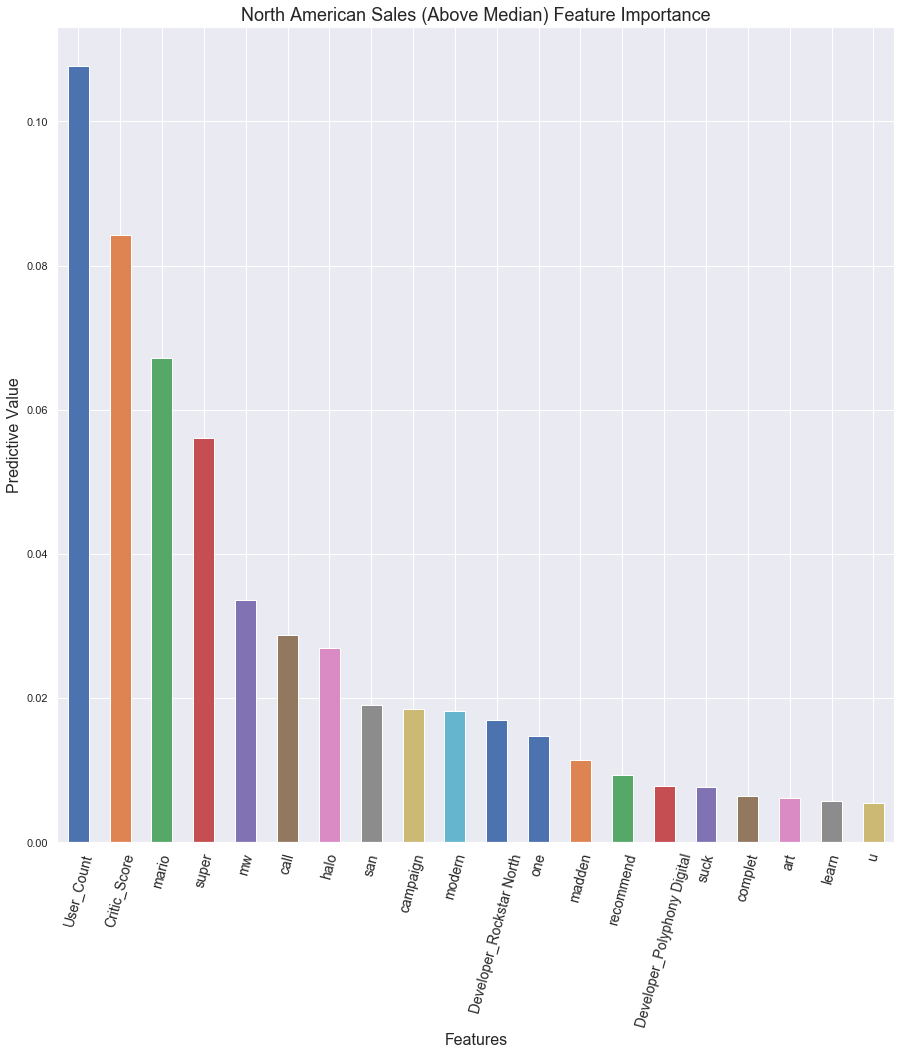

In [67]:
# Plotting Feature Importance
_ = NA_MED_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=75, fontsize=14)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel('Predictive Value', fontsize=16)
_ = plt.title('North American Sales (Above Median) Feature Importance', fontsize=18)

In [68]:
# Finding out mislabeled data
NA_MED_dif = NA_MED_y_test[NA_MED_y_test != NA_MED_y_pred]
NA_MED_dif = df.loc[list(NA_MED_dif.index.values), :]
NA_MED_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
1345,The Elder Scrolls III: Morrowind,XB,0.059568,0.000000,0.0,0.000000,0.003055,0.000000,0.000000,0.012740,...,0,0,0,0,0,0,0,0,0,1
576,Guitar Hero III: Legends of Rock,X360,0.061830,0.004763,0.0,0.000000,0.000000,0.004218,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
463,Final Fantasy Tactics,PS,0.061188,0.000000,0.0,0.000000,0.002070,0.007080,0.000000,0.003131,...,0,0,0,0,0,0,0,0,0,1
668,LEGO Batman 2: DC Super Heroes,PS3,0.072977,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
981,Need for Speed: Hot Pursuit,PS3,0.086360,0.006818,0.0,0.000000,0.001672,0.001488,0.000000,0.004135,...,0,0,0,0,0,0,0,1,0,0
1544,Warhawk,PS3,0.072356,0.006228,0.0,0.000000,0.004026,0.000000,0.004165,0.015208,...,0,0,0,0,0,0,0,0,0,1
420,Fable,XB,0.061247,0.006830,0.0,0.000000,0.000000,0.001033,0.000000,0.006192,...,0,0,0,0,0,0,0,0,1,0
498,Forza Motorsport 3,X360,0.067584,0.007787,0.0,0.000000,0.003901,0.000000,0.000000,0.003477,...,0,0,0,0,0,0,1,0,0,0
843,Mortal Kombat,PSV,0.100808,0.001212,0.0,0.000000,0.000000,0.000000,0.000000,0.001348,...,0,0,0,0,0,0,0,0,1,0
1059,Prince of Persia: The Sands of Time,PS2,0.061185,0.006165,0.0,0.000000,0.000000,0.000000,0.000000,0.044756,...,0,0,0,0,0,0,0,0,0,1


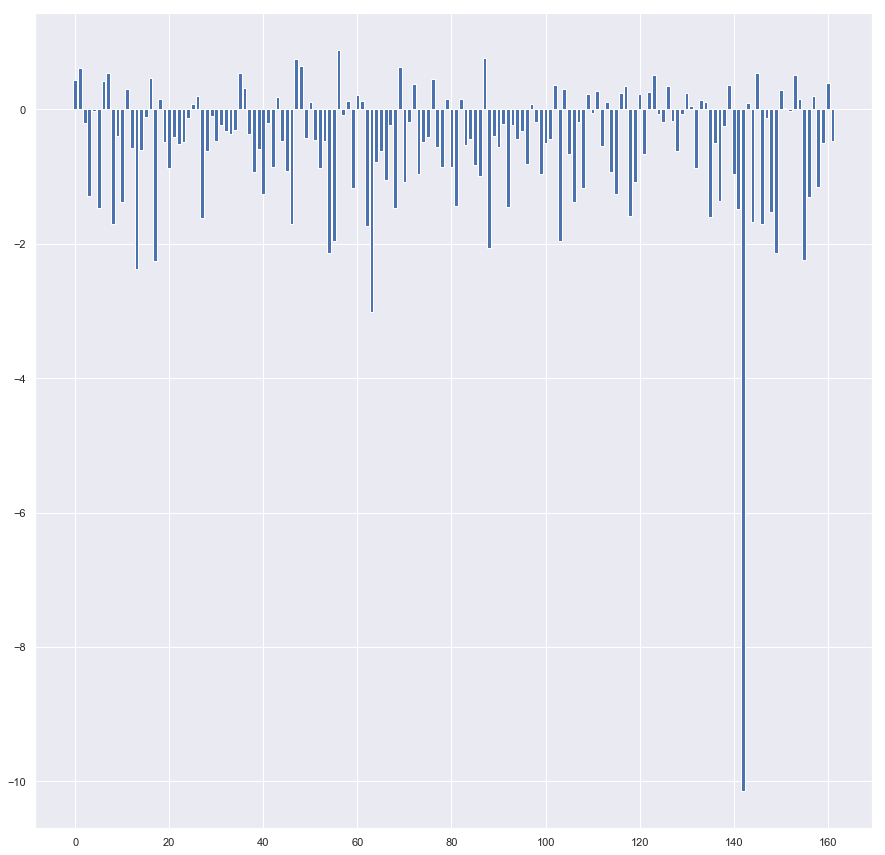

In [69]:
# Shows difference, zero in on bigger ones from there
_ = plt.bar(np.arange(len(NA_MED_y_test)), (NA_MED_y_test - NA_MED_y_pred)/NA_MED_y_test)

** Trying model for European sales.**

In [70]:
# Setting X and y for European Sales
EU_X = df.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
EU_y = df['EU_Sales']

# Splitting the data into Train and Test
EU_X_train, EU_X_test, EU_y_train, EU_y_test = train_test_split(EU_X, EU_y, test_size=0.2, random_state=42)

In [71]:
# Using a Random Forest Regressor
# Better without parameters
EU_PG = {'n_estimators': [10, 100]}

EU_RF = RandomForestRegressor(random_state=42)

# Using GridSearchCV to help avoid overfitting
EU_CV = GridSearchCV(EU_RF, EU_PG, cv=5)

EU_CV.fit(EU_X_train, EU_y_train)

EU_y_pred = EU_CV.predict(EU_X_test)

EU_R2 = EU_CV.score(EU_X_test, EU_y_test)
EU_RMSE = np.sqrt(mean_squared_error(EU_y_test, EU_y_pred))

print('R^2: ' + str(EU_R2))
print('Root Mean Squared Error: ' + str(EU_RMSE))

R^2: 0.378277852356
Root Mean Squared Error: 0.930933818247


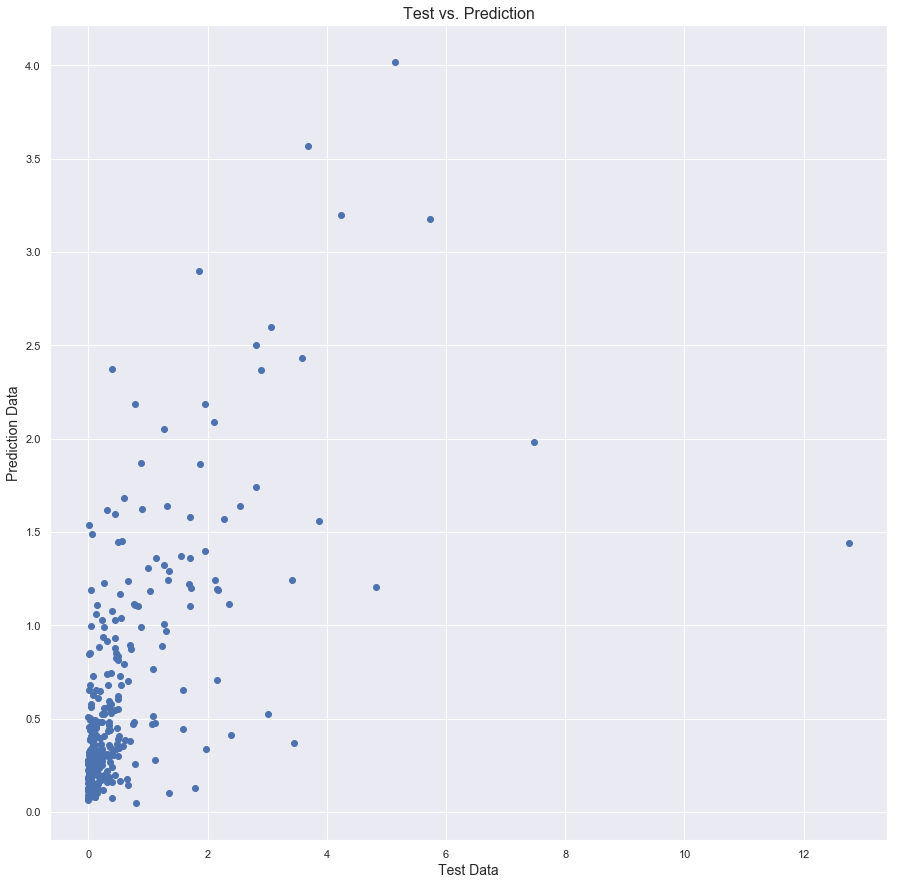

In [72]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(EU_y_test, EU_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('European Sales Test vs. Prediction', fontsize=16)

In [73]:
# Looking at most important features
EU_Features = pd.Series(EU_CV.best_estimator_.feature_importances_, index=EU_X.columns).sort_values(ascending=False)
EU_Features

User_Count                                       0.141604
fifa                                             0.053745
PC                                               0.034444
engin                                            0.029905
mw                                               0.024960
super                                            0.024936
gta                                              0.021803
Critic_Score                                     0.019469
perk                                             0.018484
steam                                            0.014670
mess                                             0.014015
mario                                            0.012177
ea                                               0.011743
mode                                             0.011683
opinion                                          0.009950
storylin                                         0.008456
money                                            0.008078
pay           

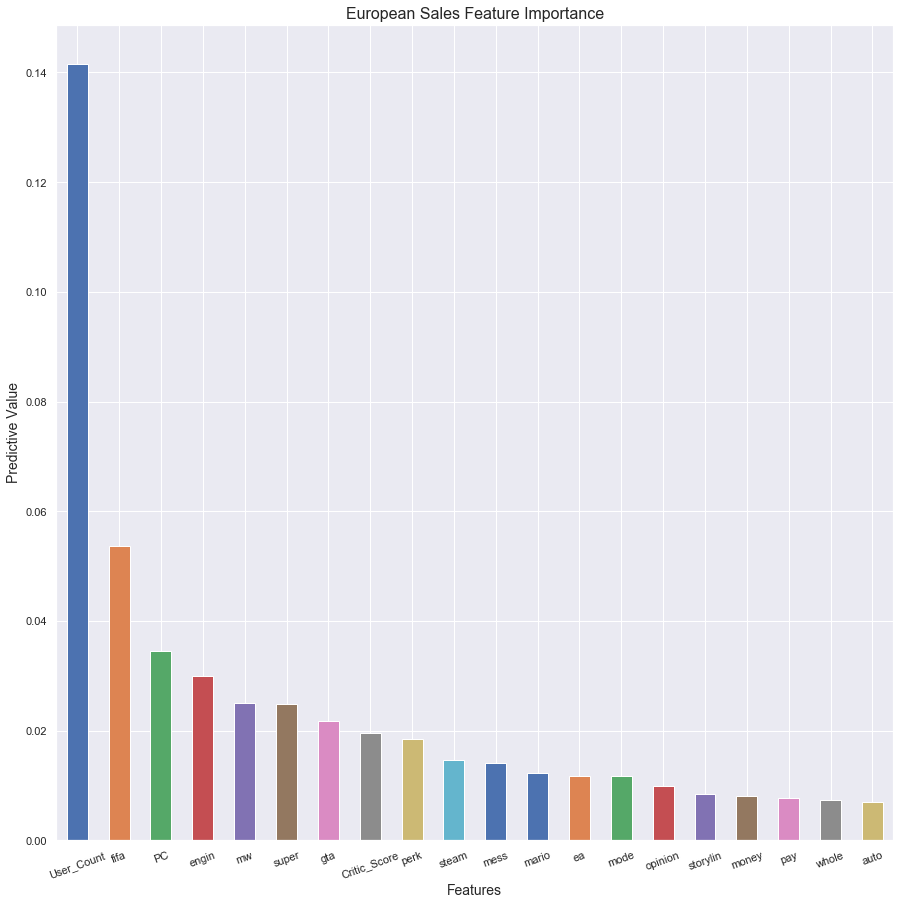

In [74]:
# Plotting Feature Importance
_ = EU_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=20)
_ = plt.xlabel('Features', fontsize=14)
_ = plt.ylabel('Predictive Value', fontsize=14)
_ = plt.title('European Sales Feature Importance', fontsize=16)

In [75]:
# Finding out mislabeled data
EU_dif = EU_y_test[EU_y_test != EU_y_pred]
EU_dif = df.loc[list(EU_dif.index.values), :]
EU_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
530,God of War: Origins Collection,PS3,0.040925,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004393,...,0,0,0,0,0,0,0,0,1,0
1140,Rise of the Tomb Raider,PC,0.071693,0.004004,0.0,0.000000,0.000000,0.000965,0.000717,0.024437,...,0,0,0,0,0,0,0,0,1,0
168,Call of Duty: World at War,X360,0.072884,0.000417,0.0,0.000000,0.001384,0.000000,0.002036,0.009523,...,0,0,0,0,0,0,0,0,1,0
135,Burnout 2: Point of Impact,XB,0.030425,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
438,Far Cry 3,PS3,0.086870,0.003050,0.0,0.003266,0.000516,0.003542,0.000000,0.008077,...,0,0,0,0,0,0,0,0,1,0
1492,Top Spin 4,X360,0.078697,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004659,...,0,0,0,0,0,0,1,0,0,0
1304,Super Smash Bros. Brawl,Wii,0.065248,0.005026,0.0,0.000000,0.000000,0.000923,0.000000,0.008787,...,0,0,0,0,0,0,0,0,0,1
239,Dark Souls III,PC,0.068478,0.005560,0.0,0.000000,0.000802,0.000569,0.001401,0.003220,...,0,0,0,0,0,0,0,0,1,0
483,Fire Emblem: Awakening,3DS,0.084028,0.006495,0.0,0.000000,0.003198,0.003918,0.000000,0.002713,...,0,0,0,0,0,0,0,0,0,1
300,Diablo III,PC,0.070642,0.008427,0.0,0.000016,0.005490,0.001018,0.014894,0.005756,...,0,0,0,0,0,0,0,0,1,0


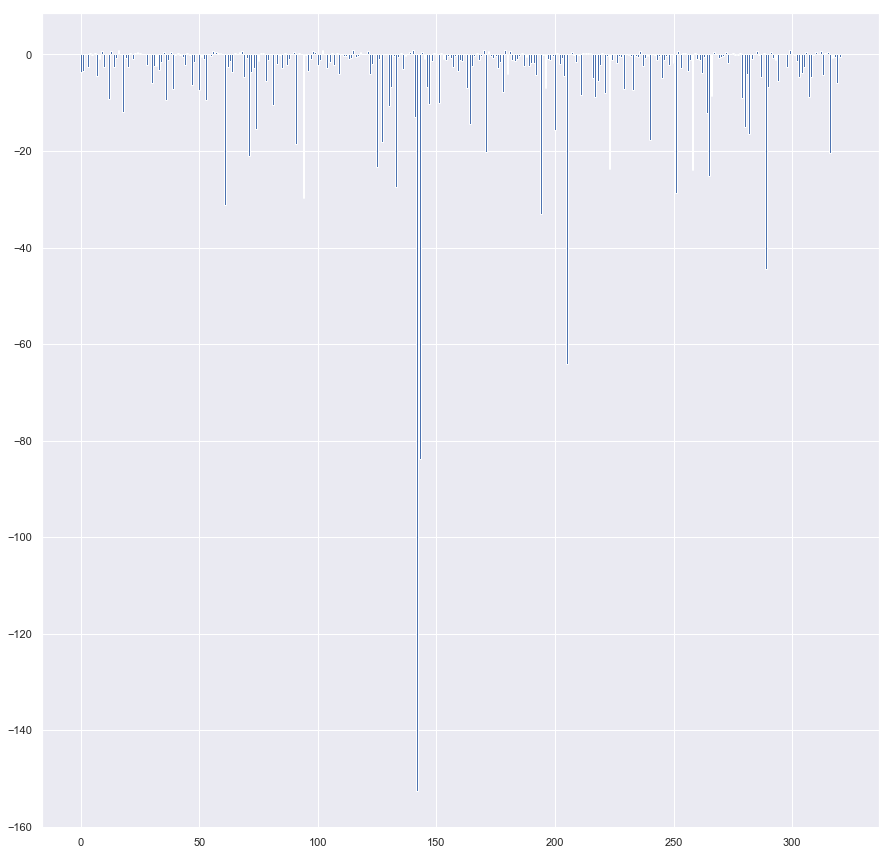

In [76]:
# Shows difference, zero in on bigger ones from there
_ = plt.bar(np.arange(len(EU_y_test)), (EU_y_test - EU_y_pred)/EU_y_test)

** Trying same model when European Sales is higher than the median.**

In [77]:
# Setting up European Sales higher than the Median
EU_median = df['EU_Sales'].median()
EU_median = df[df['EU_Sales'] >= EU_median]

# Setting X and y for European Sales
EU_MED_X = EU_median.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
EU_MED_y = EU_median['EU_Sales']

# Splitting the data into Train and Test
EU_MED_X_train, EU_MED_X_test, EU_MED_y_train, EU_MED_y_test = train_test_split(EU_MED_X, EU_MED_y, test_size=0.2, random_state=42)

In [78]:
# Using a Random Forest Regressor
# Better with parameters
EU_MED_PG = {'n_estimators': [10, 100]}

EU_MED_RF = RandomForestRegressor(min_samples_leaf=3, max_leaf_nodes=1000, random_state=42)

# Using GridSearchCV to help avoid overfitting
EU_MED_CV = GridSearchCV(EU_MED_RF, EU_MED_PG, cv=5)

EU_MED_CV.fit(EU_MED_X_train, EU_MED_y_train)

EU_MED_y_pred = EU_MED_CV.predict(EU_MED_X_test)

EU_MED_R2 = EU_MED_CV.score(EU_MED_X_test, EU_MED_y_test)
EU_MED_RMSE = np.sqrt(mean_squared_error(EU_MED_y_test, EU_MED_y_pred))

print('R^2: ' + str(EU_MED_R2))
print('Root Mean Squared Error: ' + str(EU_MED_RMSE))

R^2: 0.325143674224
Root Mean Squared Error: 0.851908328011


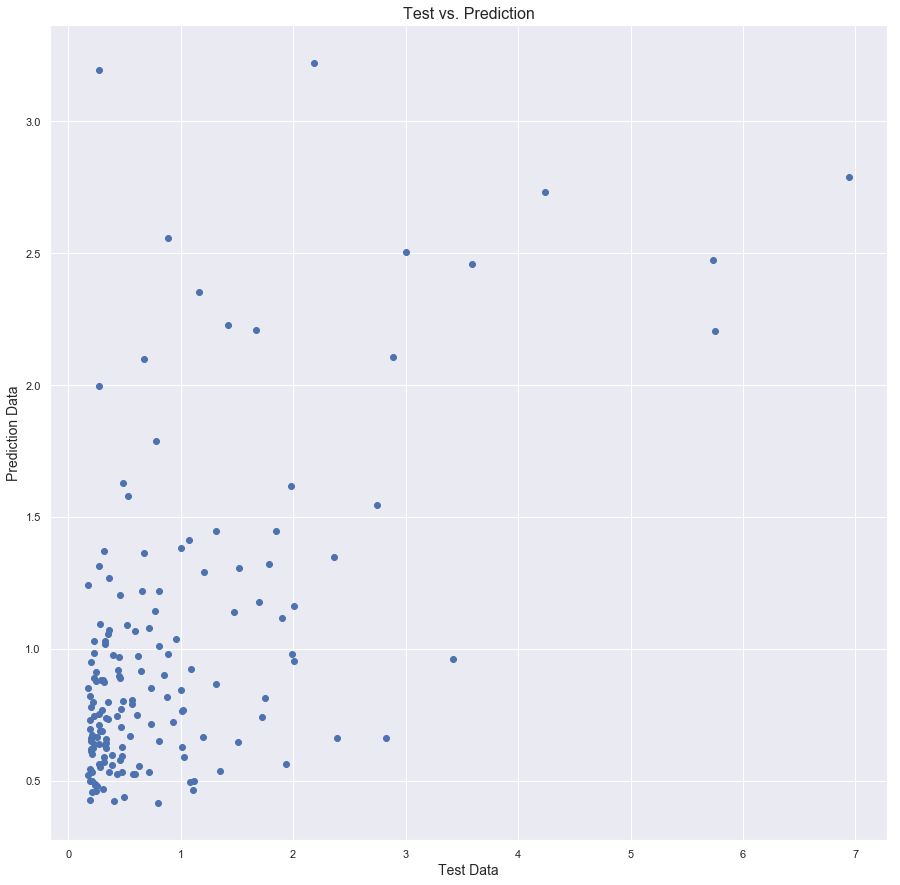

In [79]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(EU_MED_y_test, EU_MED_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('European Sales (Above Median) Test vs. Prediction', fontsize=16)

In [81]:
# Looking at most important features
EU_MED_Features = pd.Series(EU_MED_CV.best_estimator_.feature_importances_, index=EU_MED_X.columns).sort_values(ascending=False)
EU_MED_Features

kart                                              0.102967
Critic_Score                                      0.065727
mario                                             0.048421
User_Count                                        0.041106
fifa                                              0.026041
mw                                                0.021097
hasnt                                             0.020022
fanboy                                            0.019175
gta                                               0.014862
theft                                             0.013771
Developer_Rockstar North                          0.013575
fight                                             0.013045
v                                                 0.011482
call                                              0.011113
modern                                            0.010678
super                                             0.010517
brought                                           0.0088

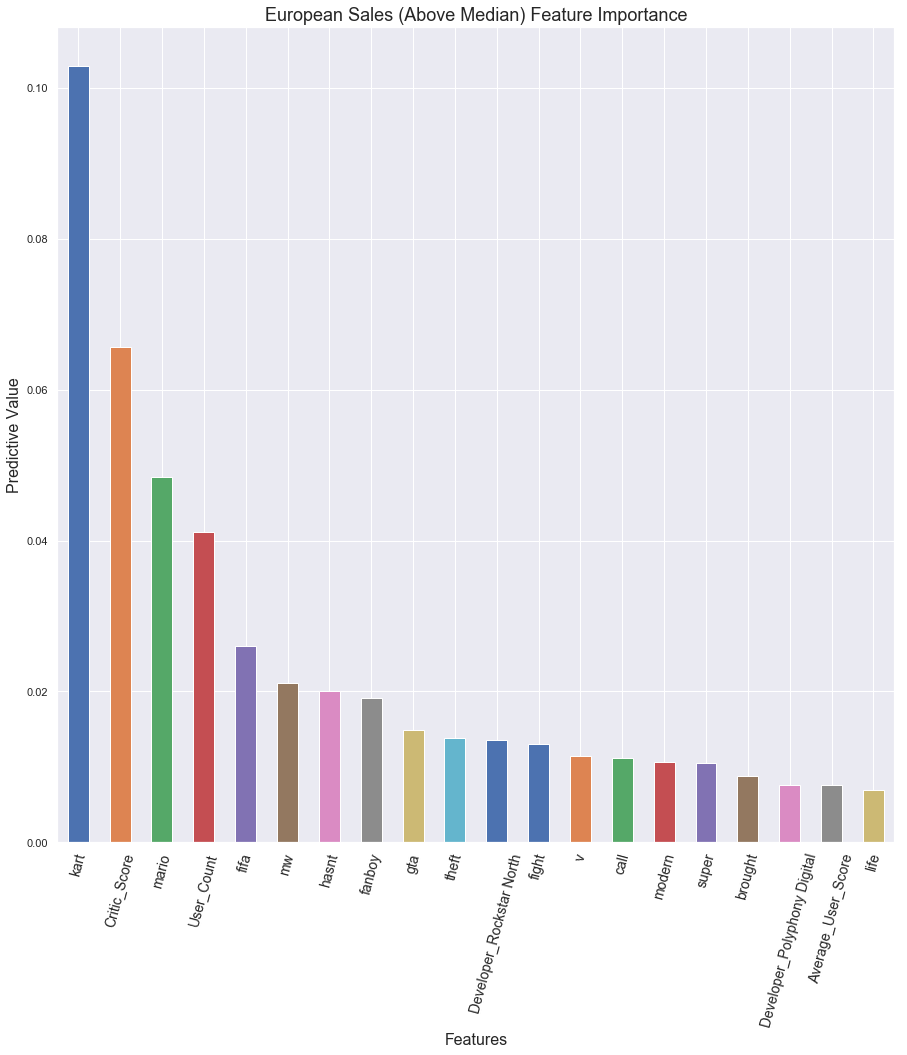

In [82]:
# Plotting Feature Importance
_ = EU_MED_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=75, fontsize=14)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel('Predictive Value', fontsize=16)
_ = plt.title('European Sales (Above Median) Feature Importance', fontsize=18)

In [83]:
# Finding out mislabeled data
EU_MED_dif = EU_MED_y_test[EU_MED_y_test != EU_MED_y_pred]
EU_MED_dif = df.loc[list(EU_MED_dif.index.values), :]
EU_MED_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
342,EA Sports Active,Wii,0.095840,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
902,NBA Live 2004,PS2,0.048266,0.011771,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
427,Fallout 4,PC,0.084649,0.007544,0.0,0.000484,0.001540,0.002673,0.001672,0.006447,...,0,0,0,0,0,0,0,0,1,0
1078,Professor Layton and the Azran Legacy,3DS,0.073907,0.008402,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
1075,Pro Evolution Soccer 2017,PS4,0.063334,0.006446,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
1570,World of Warcraft: The Burning Crusade,PC,0.047199,0.012472,0.0,0.000000,0.000000,0.000817,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
352,ESPN NFL Football,PS2,0.027962,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
1437,TimeSplitters 2,XB,0.046570,0.008586,0.0,0.000000,0.000000,0.000000,0.000000,0.021295,...,0,0,0,0,0,0,0,0,0,1
824,Metroid Prime,GC,0.071915,0.006482,0.0,0.000000,0.000000,0.002471,0.000000,0.009989,...,0,0,0,0,0,0,0,0,0,1
459,Final Fantasy Chronicles,PS,0.011873,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1


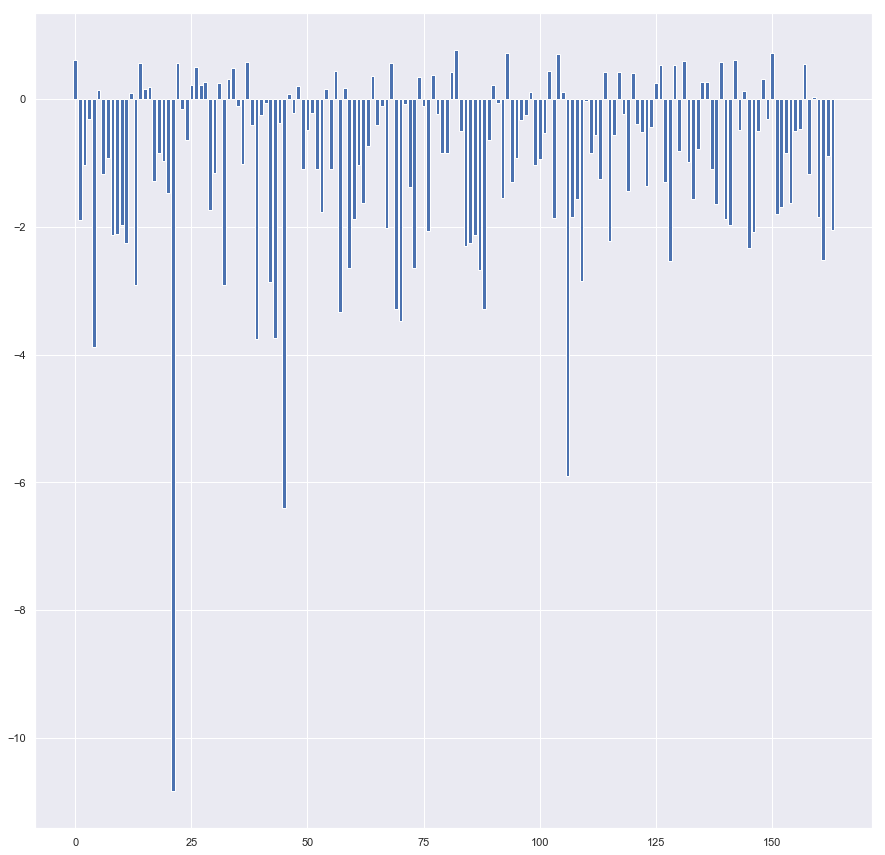

In [84]:
# Shows difference, zero in on bigger ones from there
_ = plt.bar(np.arange(len(EU_MED_y_test)), (EU_MED_y_test - EU_MED_y_pred)/EU_MED_y_test)

** Trying model for Japanese sales.**

In [85]:
# Setting X and y for Japanese Sales
JP_X = df.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
JP_y = df['JP_Sales']

# Splitting the data into Train and Test
JP_X_train, JP_X_test, JP_y_train, JP_y_test = train_test_split(JP_X, JP_y, test_size=0.2, random_state=42)

In [89]:
# Using a Random Forest Regressor
# Better without parameters
JP_PG = {'n_estimators': [10, 100]}

JP_RF = RandomForestRegressor(random_state=42)

# Using GridSearchCV to help avoid overfitting
JP_CV = GridSearchCV(JP_RF, JP_PG, cv=5)

JP_CV.fit(JP_X_train, JP_y_train)

JP_y_pred = JP_CV.predict(JP_X_test)

JP_R2 = JP_CV.score(JP_X_test, JP_y_test)
JP_RMSE = np.sqrt(mean_squared_error(JP_y_test, JP_y_pred))

print('R^2: ' + str(JP_R2))
print('Root Mean Squared Error: ' + str(JP_RMSE))

R^2: 0.373246360153
Root Mean Squared Error: 0.456585872881


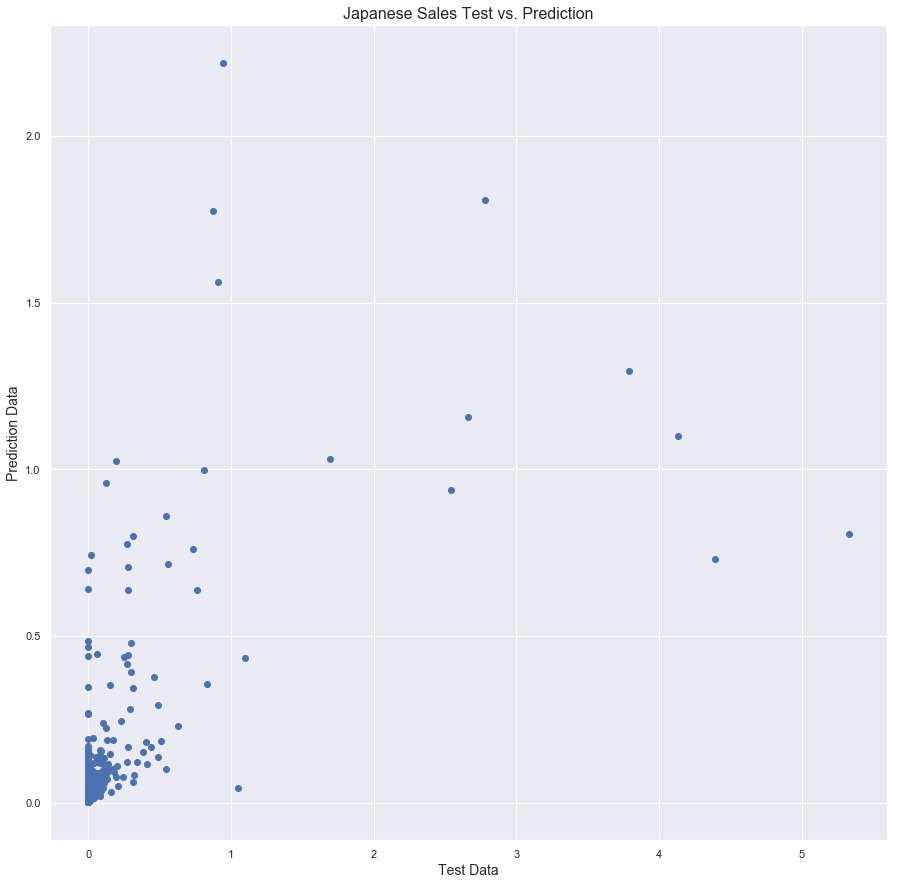

In [90]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(JP_y_test, JP_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('Japanese Sales Test vs. Prediction', fontsize=16)

In [91]:
# Looking at most important features
JP_Features = pd.Series(JP_CV.best_estimator_.feature_importances_, index=JP_X.columns).sort_values(ascending=False)
JP_Features

super                                                       0.080670
Publisher_Nintendo                                          0.072419
Developer_SquareSoft                                        0.066180
ff                                                          0.065171
dragon                                                      0.044075
mario                                                       0.043233
quest                                                       0.038503
monster                                                     0.028773
armor                                                       0.021342
evil                                                        0.017546
Developer_Polyphony Digital                                 0.015960
Developer_Nintendo                                          0.014735
hunt                                                        0.013589
freedom                                                     0.010778
final                             

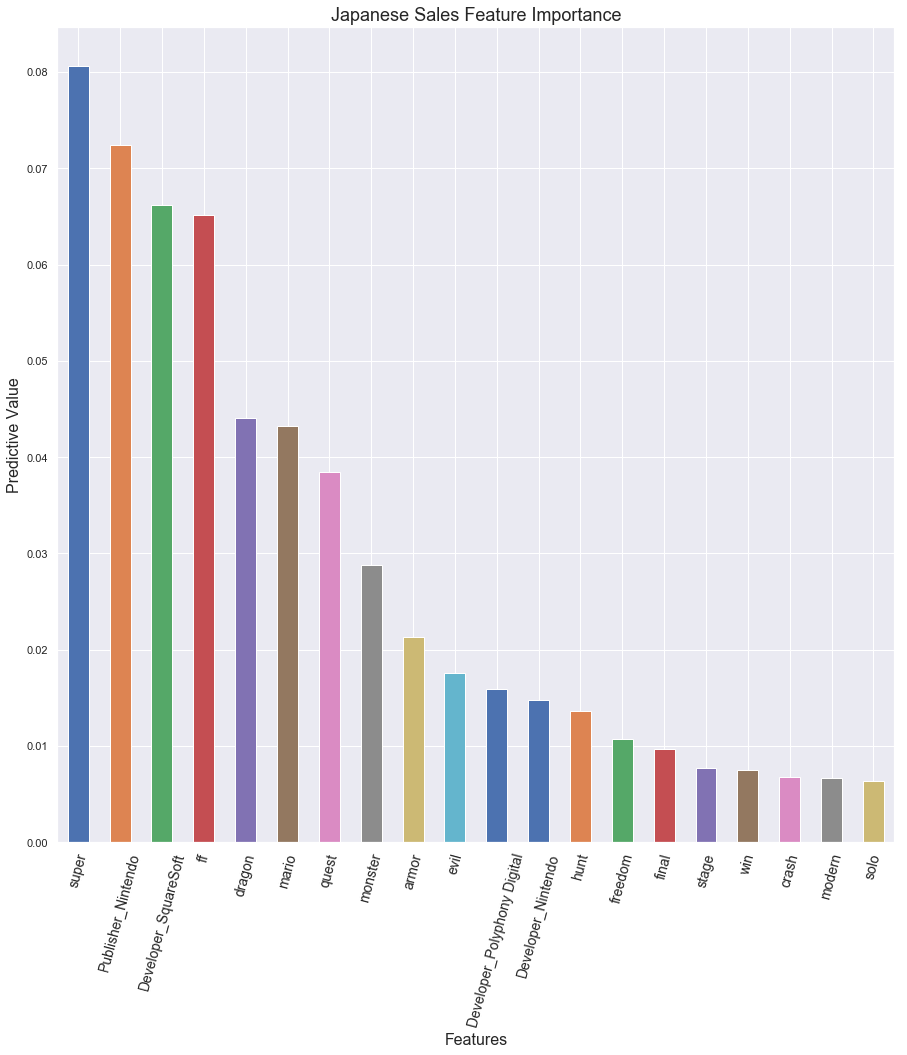

In [92]:
# Plotting Feature Importance
_ = JP_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=75, fontsize=14)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel('Predictive Value', fontsize=16)
_ = plt.title('Japanese Sales Feature Importance', fontsize=18)

In [93]:
# Finding out mislabeled data
JP_dif = JP_y_test[JP_y_test != JP_y_pred]
JP_dif = df.loc[list(JP_dif.index.values), :]
JP_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
530,God of War: Origins Collection,PS3,0.040925,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004393,...,0,0,0,0,0,0,0,0,1,0
1140,Rise of the Tomb Raider,PC,0.071693,0.004004,0.0,0.000000,0.000000,0.000965,0.000717,0.024437,...,0,0,0,0,0,0,0,0,1,0
168,Call of Duty: World at War,X360,0.072884,0.000417,0.0,0.000000,0.001384,0.000000,0.002036,0.009523,...,0,0,0,0,0,0,0,0,1,0
135,Burnout 2: Point of Impact,XB,0.030425,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
438,Far Cry 3,PS3,0.086870,0.003050,0.0,0.003266,0.000516,0.003542,0.000000,0.008077,...,0,0,0,0,0,0,0,0,1,0
1492,Top Spin 4,X360,0.078697,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004659,...,0,0,0,0,0,0,1,0,0,0
1304,Super Smash Bros. Brawl,Wii,0.065248,0.005026,0.0,0.000000,0.000000,0.000923,0.000000,0.008787,...,0,0,0,0,0,0,0,0,0,1
239,Dark Souls III,PC,0.068478,0.005560,0.0,0.000000,0.000802,0.000569,0.001401,0.003220,...,0,0,0,0,0,0,0,0,1,0
483,Fire Emblem: Awakening,3DS,0.084028,0.006495,0.0,0.000000,0.003198,0.003918,0.000000,0.002713,...,0,0,0,0,0,0,0,0,0,1
300,Diablo III,PC,0.070642,0.008427,0.0,0.000016,0.005490,0.001018,0.014894,0.005756,...,0,0,0,0,0,0,0,0,1,0


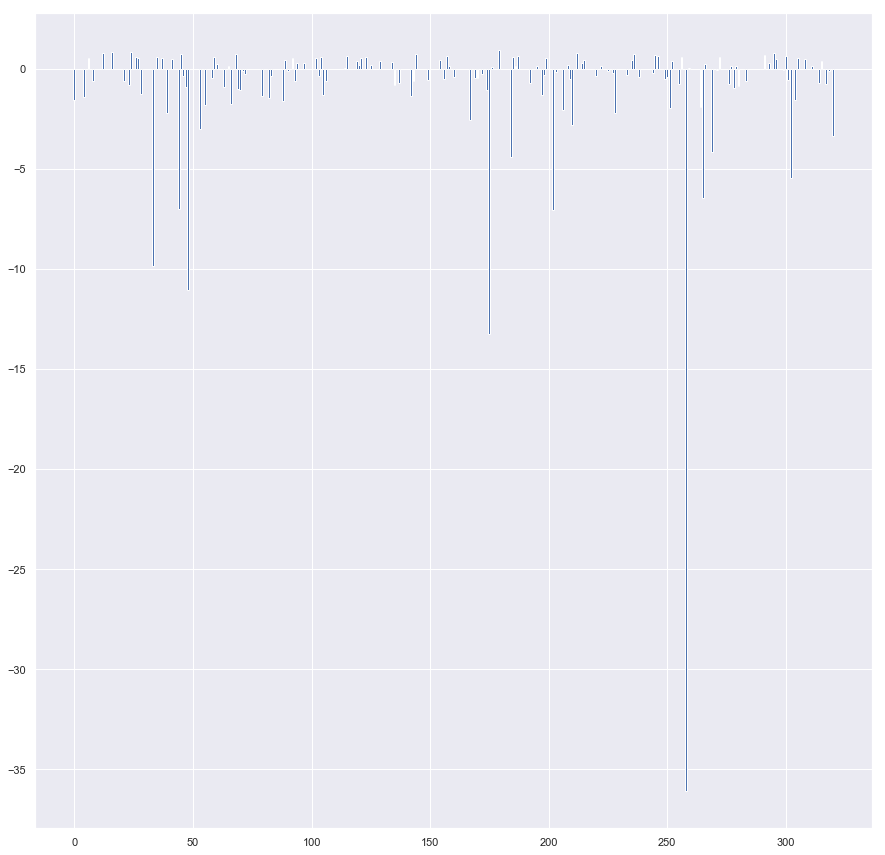

In [94]:
# Shows difference, zero in on bigger ones from there
_ = plt.bar(np.arange(len(JP_y_test)), (JP_y_test - JP_y_pred)/JP_y_test)

** Trying same model when Japanese Sales is higher than the median.**

In [4]:
# Setting up Japanese Sales higher than the Median
JP_median = df['JP_Sales'].median()
JP_median = df[df['JP_Sales'] >= JP_median]

# Setting X and y for Japanese Sales
JP_MED_X = JP_median.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
JP_MED_y = JP_median['JP_Sales']

# Splitting the data into Train and Test
JP_MED_X_train, JP_MED_X_test, JP_MED_y_train, JP_MED_y_test = train_test_split(JP_MED_X, JP_MED_y, test_size=0.2, random_state=42)

In [7]:
# Using a Random Forest Regressor
JP_MED_PG = {'n_estimators': [10, 100]}

JP_MED_RF = RandomForestRegressor(random_state=42)

# Using GridSearchCV to help avoid overfitting
JP_MED_CV = GridSearchCV(JP_MED_RF, JP_MED_PG, cv=5)

JP_MED_CV.fit(JP_MED_X_train, JP_MED_y_train)

JP_MED_y_pred = JP_MED_CV.predict(JP_MED_X_test)

JP_MED_R2 = JP_MED_CV.score(JP_MED_X_test, JP_MED_y_test)
JP_MED_RMSE = np.sqrt(mean_squared_error(JP_MED_y_test, JP_MED_y_pred))

print('R^2: ' + str(JP_MED_R2))
print('Root Mean Squared Error: ' + str(JP_MED_RMSE))

R^2: 0.373246360153
Root Mean Squared Error: 0.456585872881


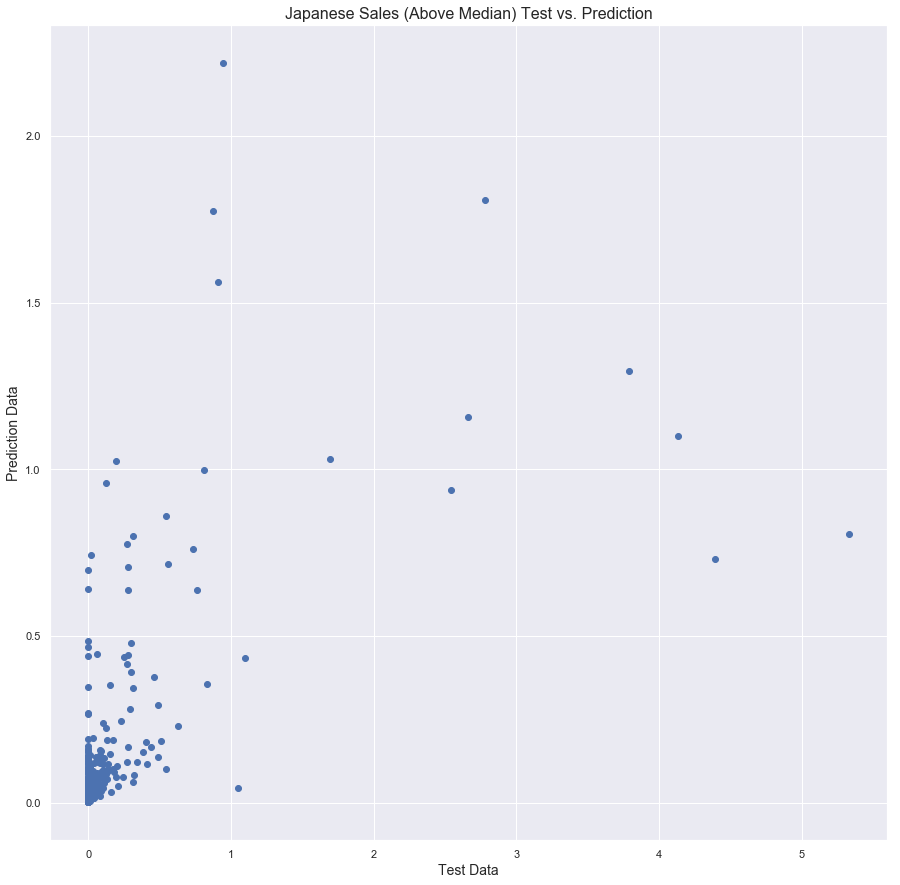

In [8]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(JP_MED_y_test, JP_MED_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('Japanese Sales (Above Median) Test vs. Prediction', fontsize=16)

In [9]:
# Looking at most important features
JP_MED_Features = pd.Series(JP_MED_CV.best_estimator_.feature_importances_, index=JP_MED_X.columns).sort_values(ascending=False)
JP_MED_Features

super                                                       0.080670
Publisher_Nintendo                                          0.072419
Developer_SquareSoft                                        0.066180
ff                                                          0.065171
dragon                                                      0.044075
mario                                                       0.043233
quest                                                       0.038503
monster                                                     0.028773
armor                                                       0.021342
evil                                                        0.017546
Developer_Polyphony Digital                                 0.015960
Developer_Nintendo                                          0.014735
hunt                                                        0.013589
freedom                                                     0.010778
final                             

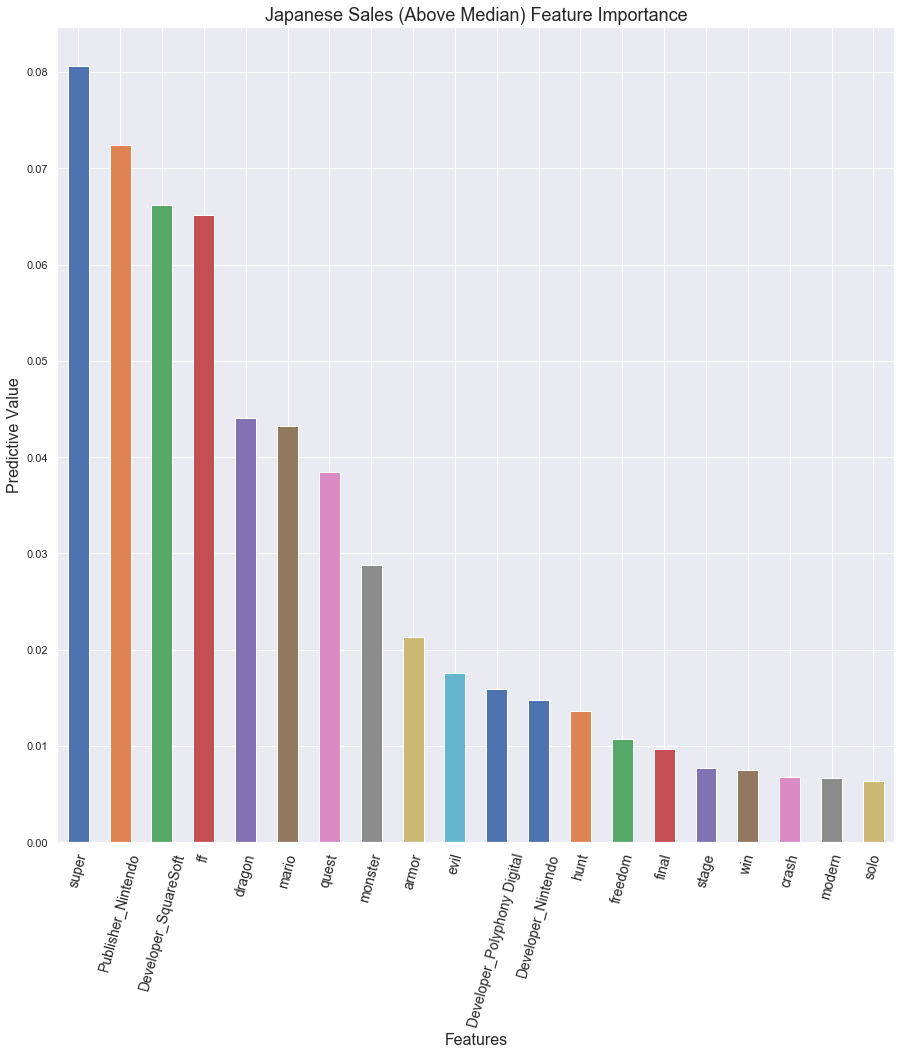

In [10]:
# Plotting Feature Importance
_ = JP_MED_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=75, fontsize=14)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel('Predictive Value', fontsize=16)
_ = plt.title('Japanese Sales (Above Median) Feature Importance', fontsize=18)

In [11]:
# Finding out mislabeled data
JP_MED_dif = JP_MED_y_test[JP_MED_y_test != JP_MED_y_pred]
JP_MED_dif = df.loc[list(JP_MED_dif.index.values), :]
JP_MED_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
530,God of War: Origins Collection,PS3,0.040925,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004393,...,0,0,0,0,0,0,0,0,1,0
1140,Rise of the Tomb Raider,PC,0.071693,0.004004,0.0,0.000000,0.000000,0.000965,0.000717,0.024437,...,0,0,0,0,0,0,0,0,1,0
168,Call of Duty: World at War,X360,0.072884,0.000417,0.0,0.000000,0.001384,0.000000,0.002036,0.009523,...,0,0,0,0,0,0,0,0,1,0
135,Burnout 2: Point of Impact,XB,0.030425,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
438,Far Cry 3,PS3,0.086870,0.003050,0.0,0.003266,0.000516,0.003542,0.000000,0.008077,...,0,0,0,0,0,0,0,0,1,0
1492,Top Spin 4,X360,0.078697,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004659,...,0,0,0,0,0,0,1,0,0,0
1304,Super Smash Bros. Brawl,Wii,0.065248,0.005026,0.0,0.000000,0.000000,0.000923,0.000000,0.008787,...,0,0,0,0,0,0,0,0,0,1
239,Dark Souls III,PC,0.068478,0.005560,0.0,0.000000,0.000802,0.000569,0.001401,0.003220,...,0,0,0,0,0,0,0,0,1,0
483,Fire Emblem: Awakening,3DS,0.084028,0.006495,0.0,0.000000,0.003198,0.003918,0.000000,0.002713,...,0,0,0,0,0,0,0,0,0,1
300,Diablo III,PC,0.070642,0.008427,0.0,0.000016,0.005490,0.001018,0.014894,0.005756,...,0,0,0,0,0,0,0,0,1,0


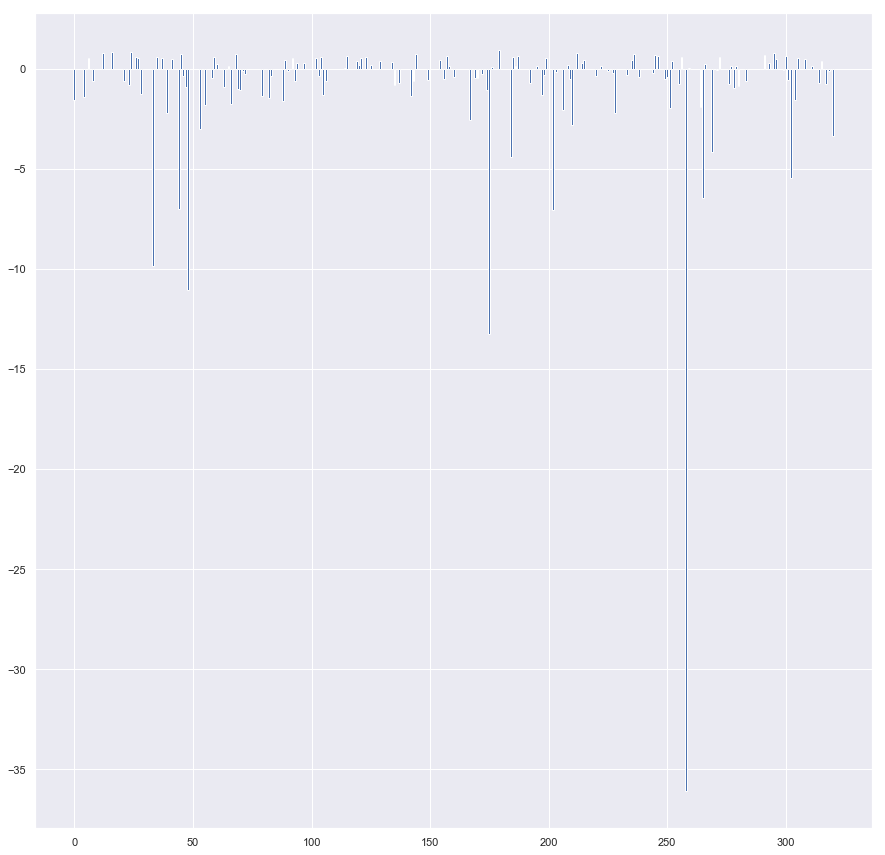

In [12]:
# Shows difference, zero in on bigger ones from there
_ = plt.bar(np.arange(len(JP_MED_y_test)), (JP_MED_y_test - JP_MED_y_pred)/JP_MED_y_test)